In [1]:
import json
from datetime import datetime, timedelta

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:

flist = ['bigpanda.hc20327687.tid1381.pkl', 
         'bigpanda.hc20327751.tid1381.pkl', 
         'bigpanda.hc20327824.tid1381.pkl',
         'bigpanda.hc20324124.tid1337.pkl',
        ]
leglist = ['LRZ-LMU: direct IO from GridKa via HDD-xcache', 
           'LRZ-LMU: direct IO from GridKa via SSD-xcache', 
           'LRZ-LMU: direct IO from GridKa w/o Cache',
           'LRZ-LMU: direct IO from local T2-dCache', 
          ]
dfl = [pd.read_pickle(f) for f in flist]


for df,leg in zip(dfl,leglist):
    df['label'] = leg 

dft = pd.concat(dfl)

In [3]:
[len(x) for x in dfl]

[251, 2509, 911, 654]

In [4]:
len(dfl)


4

In [ ]:
#njobs = [counts[int(x)] for x in df.avg_minute]

# avg number of active jobs during job execution
#df['njobs'] = [sum(counts[int(s):int(s+t)])/t for s,t in zip(df.start_minute,df.durationmin)]

fig = plt.figure(figsize=(7,7))
for df,leg in zip(dfl,leglist):
    plt.scatter(df.njobs, df.cpuefficiency, alpha=0.1, marker=".",label=leg)

plt.axis([-5, 251, 0, 100]);
plt.xlabel('# active jobs')
plt.ylabel('CPU-eff');
#plt.legend(loc='center right')
plt.legend(loc=(0.40,0.20))
plt.title('HC stress test LRZ-LMU')

#plt.plot(njobs, df.readrate, '.')
#plt.plot(njobs, df.cpuefficiency, '.')
#fig.savefig('LRZ-LMU_eff_njobs.png')


In [ ]:
fig = plt.figure(figsize=(8,6))
for df,leg in zip(dfl,leglist):
#    sns.scatterplot(x=df.njobs, y=df.cpuefficiency, alpha=0.1, marker=".",label=leg)
    sns.scatterplot(x=df.njobs, y=df.cpuefficiency, alpha=0.3, label=leg)

plt.axis([-5, 251, 0, 100]);
plt.xlabel('# active jobs')
plt.ylabel('CPU-efficiency');
plt.legend(loc=(0.50,0.10))
plt.title('HC stress test LRZ-LMU')
fig.savefig('LRZ-LMU_eff_njobs.png')

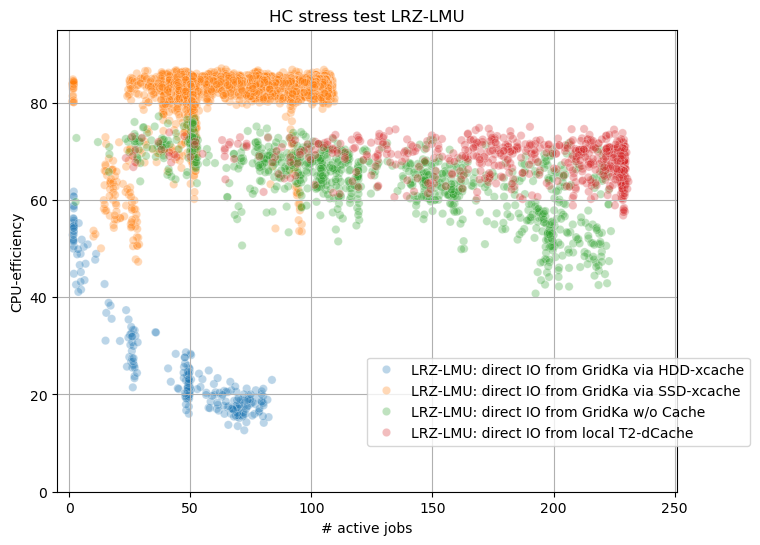

In [36]:
fig = plt.figure(figsize=(8,6))
sns.scatterplot(x=dft.njobs, y=dft.cpuefficiency, hue=dft.label, alpha=0.3)

plt.axis([-5, 251, 0, 95]);
plt.xlabel('# active jobs')
plt.ylabel('CPU-efficiency');
plt.legend(loc=(0.50,0.10))
plt.title('HC stress test LRZ-LMU')
plt.grid()
fig.savefig('LRZ-LMU_eff_njobs.png')

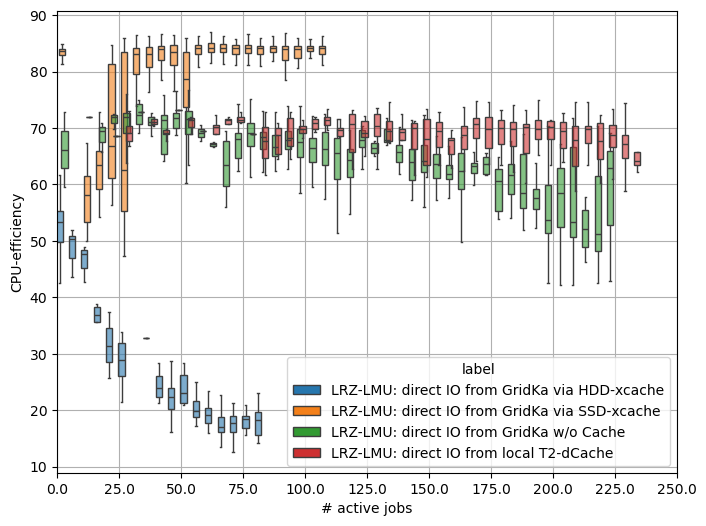

In [34]:
bins = np.linspace(0, 250, 51)

fig = plt.figure(figsize=(8,6))
binc = np.digitize(dft.njobs, bins)
#binc *= 5

ax = sns.boxplot(x=binc, y=dft.cpuefficiency, hue=dft.label, saturation=0.9, widths=0.5, showfliers=False)#, labels=[leg]);
    #sns.violinplot(x=binc, y=df.cpuefficiency, saturation=1);


# hack to fix alpha
for patch in ax.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .6))

#ax.set_xticks((bins/5)[::5])
#plt.axis([-3, 53, 0, 100]);

# hack to fix x-axis labels
ax.set_xticks(((bins-2.5)/5)[::5])
ax.set_xticklabels(bins[::5]);

ax.set_xlabel('# active jobs')
ax.set_ylabel('CPU-efficiency');
plt.grid()
fig.savefig('LRZ-LMU_eff_njobs_boxp.png')